## SALES FORECASTING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from math import sqrt

In [4]:
!pip install xlrd

In [7]:
d1=pd.read_excel("/content/interactions.xlsx")

In [8]:
d1.head()

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you


In [9]:
d2=pd.read_excel("/content/sales-pipeline.xlsx")
d2.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256


In [10]:
d2=d2[d2['Deal_Stage']=='Won']

In [11]:
d2.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24
6,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335
7,Y-corporation,GIUUTBXM,Kary Hendrixson,kary@piedpiper.com,rosanne@y-corporation.com,Won,GTXPro,5539,2016-01-10,2016-12-03,328


In [15]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [13]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 5.5MB/s 


In [16]:
d1 = d1[~(d1.toEmailId.str.contains("@piedpiper.com") & d1.fromEmailId.str.contains("@piedpier"))]

In [17]:
scores =[]
text=d1['Extracted Interaction Text']
for sentence in text:
    score = analyser.polarity_scores(sentence)
    scores.append(score)

In [18]:
df3=pd.DataFrame(scores)
d1=pd.concat([d1,df3.compound],axis=1)

In [19]:
d1 = d1.rename(columns = {"compound":"Score"})

In [20]:
d1.tail()

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text,Score
316771,4113251,jonathan@piedpiper.com,jonathan@piedpiper.com,2019-08-01,Call,I hope you have all had a chance to look at ou...,0.9627
316772,1017954,darcel@piedpiper.com,darcel@piedpiper.com,2019-08-01,Call,I'm not convinced with the progress of the pro...,0.1386
316773,1776707,rosalina@piedpiper.com,rosalina@piedpiper.com,2019-08-01,Call,After spending nearly five years consulting fo...,0.0772
316774,9400643,lajuana@piedpiper.com,lajuana@piedpiper.com,2019-08-01,Call,We appreciate your interest in Doe's English L...,0.5434
316775,4148300,vicki@piedpiper.com,vicki@piedpiper.com,2019-08-01,Email,"In order to dispel any rumors, the management ...",-0.0302


In [21]:
d1.drop(['InteractionDate','InteractionType(Call/Email/SMS)'], axis='columns', inplace=True)

In [22]:
d1.shape

(316776, 5)

In [23]:
grp=d1.groupby(['fromEmailId','toEmailId'])['Score'].mean()
d1=grp.to_frame()

In [24]:
d1.reset_index(level='fromEmailId',inplace=True)
d1.reset_index(level='toEmailId',inplace=True)
d1.head()

,toEmailId,fromEmailId,Score
0,alejandro@initech.com,anna@piedpiper.com,0.360613
1,anna@piedpiper.com,anna@piedpiper.com,0.352397
2,antionette@bluthcompany.com,anna@piedpiper.com,0.412384
3,ashlie@sonron.com,anna@piedpiper.com,0.298181
4,belinda@finjob.com,anna@piedpiper.com,0.388701


In [25]:
d1.head()

,toEmailId,fromEmailId,Score
0,alejandro@initech.com,anna@piedpiper.com,0.360613
1,anna@piedpiper.com,anna@piedpiper.com,0.352397
2,antionette@bluthcompany.com,anna@piedpiper.com,0.412384
3,ashlie@sonron.com,anna@piedpiper.com,0.298181
4,belinda@finjob.com,anna@piedpiper.com,0.388701


In [26]:
d2=d2.drop(['Deal_Stage','Account', 'Opportunity_ID', 'Sales_Agent','DateDiff','Created Date'],axis=1)

In [27]:
d2.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,Close Date
0,corliss@piedpiper.com,delila@konex.com,GTX Plus Basic,1255,2016-05-24
1,rosalina@piedpiper.com,belinda@finjob.com,MG Special,45,2016-11-02
5,lajuana@piedpiper.com,candice@stanredtax.com,MG Advanced,3180,2016-01-31
6,zane@piedpiper.com,tyron@hatfan.com,GTX Basic,517,2016-12-08
7,kary@piedpiper.com,rosanne@y-corporation.com,GTXPro,5539,2016-12-03


In [28]:
final_df = pd.merge(d2, d1,  how='left', left_on=['SalesAgentEmailID', 'ContactEmailID'], right_on = ['fromEmailId','toEmailId'])

In [29]:
final_df.shape

(4238, 8)

In [30]:
final_df=final_df.drop(['toEmailId','fromEmailId'],axis=1)

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
final_df['Product'] = encoder.fit_transform(final_df['Product'])
final_df['SalesAgentEmailID'] = encoder.fit_transform(final_df['SalesAgentEmailID'])
final_df['ContactEmailID'] = encoder.fit_transform(final_df['ContactEmailID'])

In [32]:
final_df.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,Close Date,Score
0,4,17,2,1255,2016-05-24,0.375377
1,23,3,6,45,2016-11-02,0.361523
2,16,6,5,3180,2016-01-31,0.304921
3,29,75,1,517,2016-12-08,0.448903
4,15,65,4,5539,2016-12-03,0.300602


In [33]:
final_df['Y-M'] = final_df['Close Date'].dt.strftime('%Y-%m')

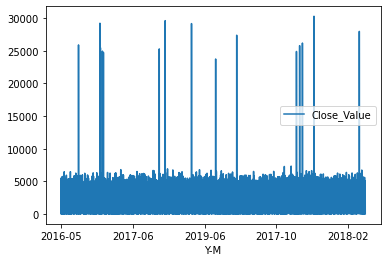

In [34]:
final_df.plot.line(x='Y-M',y='Close_Value');

In [35]:
final_df['Year']=pd.DatetimeIndex(final_df['Y-M']).year

In [36]:
final_df['Month']=pd.DatetimeIndex(final_df['Y-M']).month

In [37]:
final_df=final_df.drop(['Close Date'],axis=1)

In [38]:
final_df.shape

(4238, 8)

### AD FULLER TEST

In [39]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
adfuller_test(final_df['Close_Value'])

ADF Test Statistic : -65.30983967464397
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 4237
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [41]:
train_size = int(len(final_df) * 0.80)
test_size = len(final_df) - train_size

In [42]:
train, test = final_df.iloc[0:train_size,:] , final_df.iloc[train_size:len(final_df),:]

In [43]:
print(train.shape) 
print(test.shape)

(3390, 8)
(848, 8)


In [155]:
from sklearn.preprocessing import MinMaxScaler
columns = ["SalesAgentEmailID","ContactEmailID","Product","Score","Year","Month"]
transformer = MinMaxScaler(feature_range=(-1,1))
transformer = transformer.fit(train[columns].to_numpy())
train.loc[:, columns] = transformer.transform(train[columns].to_numpy())
test.loc[:, columns] = transformer.transform(test[columns].to_numpy())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [156]:
transformer = MinMaxScaler(feature_range=(-1,1))
fin_transformer = transformer.fit(train[['Close_Value']])
train['Close_Value'] = fin_transformer.transform(train[['Close_Value']])
test['Close_Value'] = fin_transformer.transform(test[['Close_Value']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [269]:
x_train = train[["SalesAgentEmailID","ContactEmailID","Month","Year","Product","Score"]].values
y_train = train[["Close_Value"]].values
x_test = test[["SalesAgentEmailID","ContactEmailID","Month","Year","Product","Score"]].values
y_test = test[["Close_Value"]].values

In [270]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1])

In [271]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3390, 6) (3390, 1)
(848, 6) (848, 1)


### XGBOOST REGRESSOR

In [284]:
import xgboost 
from xgboost import XGBRegressor
model1 = XGBRegressor()
model1.fit(x_train, y_train)

[16:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [285]:
y_pred = model1.predict(x_test)

In [286]:
from sklearn import metrics
from math import sqrt
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y_pred,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(y_pred,y_test)))

MEAN ABSOLUTE ERROR: 0.013972940893665638
ROOT MEAN SQUARE ERROR: 0.023847248707975954


In [258]:
y_test = fin_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred = fin_transformer.inverse_transform(y_pred.reshape(1,-1))

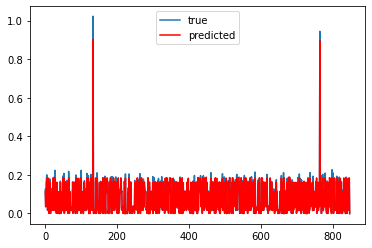

In [259]:
plt.plot(y_test.flatten(),label = 'true')
plt.plot(y_pred.flatten(), 'r',label = 'predicted')
plt.legend();

### LINEAR REGRESSION

In [275]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
reg=LR.fit(x_train,y_train)
p=LR.predict(x_test)

In [276]:
from sklearn import metrics
from math import sqrt
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(p,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(p,y_test)))

MEAN ABSOLUTE ERROR: 0.13357742978605472
ROOT MEAN SQUARE ERROR: 0.16504237646293024


### RANDOM FOREST REGRESSOR

In [279]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=100)
reg3=regr.fit(x_train,y_train)
p1=regr.predict(x_test)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [280]:
from sklearn import metrics
from math import sqrt
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(p1,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(p1,y_test)))

MEAN ABSOLUTE ERROR: 0.014404783624046982
ROOT MEAN SQUARE ERROR: 0.02546472441794634


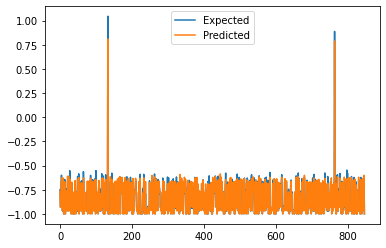

In [168]:
plt.plot(y_test,label='Expected')
plt.plot(p1, label='Predicted')
plt.legend();

### LSTM

In [169]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [170]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3390, 6, 1) (3390, 1)
(848, 6, 1) (848, 1)


In [171]:
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [172]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [173]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [174]:

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
53/53 [==============================] - 8s 48ms/step - loss: 0.3918 - val_loss: 0.0305
Epoch 2/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0308 - val_loss: 0.0279
Epoch 3/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0346 - val_loss: 0.0275
Epoch 4/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0302 - val_loss: 0.0275
Epoch 5/100
53/53 [==============================] - 1s 18ms/step - loss: 0.0300 - val_loss: 0.0273
Epoch 6/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0337 - val_loss: 0.0274
Epoch 7/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0279 - val_loss: 0.0276
Epoch 8/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0358 - val_loss: 0.0277
Epoch 9/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0320 - val_loss: 0.0271
Epoch 10/100
53/53 [==============================] - 1s 17ms/step - loss: 0.0287 - val_loss: 0.0276

In [175]:
y_pred = model.predict(x_test)

In [176]:
y_train_inv = fin_transformer.inverse_transform(y_train.reshape(1,-1))
y_test_inv = fin_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = fin_transformer.inverse_transform(y_pred)

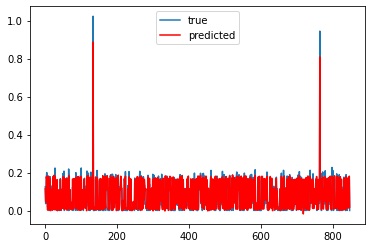

In [177]:
plt.plot(y_test_inv.flatten(),label = 'true')
plt.plot(y_pred_inv.flatten(), 'r',label = 'predicted')
plt.legend();

In [192]:
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y_pred,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(y_pred,y_test)))

MEAN ABSOLUTE ERROR: 0.02256888614509716
ROOT MEAN SQUARE ERROR: 0.03057735706971727


### LASSO REGRESSION

In [281]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(x_train, y_train)
Y_pred = lasso_reg.predict(x_test)

In [282]:
from sklearn import metrics
from math import sqrt
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(Y_pred,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(Y_pred,y_test)))

MEAN ABSOLUTE ERROR: 0.1361071820814692
ROOT MEAN SQUARE ERROR: 0.16606405407229727


### SCORES

In [283]:
from tabulate import tabulate
table = [["Linear Regression",0.165,0.133],["RandomForestRegressor",0.025,0.014],["XGBRegressor",0.023,0.013,"BEST"],["LassoRegressor",0.165,0.133,],["LSTM",0.030,0.022,]]
print(tabulate(table, headers=["REGRESSION","RMSE","MAE","BETTER MODEL"]))

REGRESSION               RMSE    MAE  BETTER MODEL
---------------------  ------  -----  --------------
Linear Regression       0.165  0.133
RandomForestRegressor   0.025  0.014
XGBRegressor            0.023  0.013  BEST
LassoRegressor          0.165  0.133
LSTM                    0.03   0.022


### FORECAST ( XGBoost Regressor)

In [287]:
forecast=final_df

In [288]:
forecast.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,Score,Y-M,Year,Month
0,0.137931,0.202381,0.333333,0.040231,0.566347,2016-05,0.0,0.363636
1,0.793103,0.035714,1.000000,0.000231,0.539432,2016-11,0.0,0.909091
2,0.551724,0.071429,0.833333,0.103868,0.429468,2016-01,0.0,0.000000
3,1.000000,0.892857,0.166667,0.015835,0.709191,2016-12,0.0,1.000000
4,0.517241,0.773810,0.666667,0.181851,0.421076,2016-12,0.0,1.000000


In [289]:
from sklearn.preprocessing import MinMaxScaler
columns = ["SalesAgentEmailID","ContactEmailID","Product","Score","Year","Month"]
transformer = MinMaxScaler(feature_range=(-1,1))
transformer = transformer.fit(forecast[columns].to_numpy())
forecast.loc[:, columns] = transformer.transform(forecast[columns].to_numpy())


In [290]:
transformer = MinMaxScaler(feature_range=(-1,1))
fin_transformer = transformer.fit(forecast[['Close_Value']])
forecast['Close_Value'] = fin_transformer.transform(forecast[['Close_Value']])

In [291]:
forecast.head()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,Score,Y-M,Year,Month
0,-0.724138,-0.595238,-0.333333,-0.919537,0.132694,2016-05,-1.0,-0.272727
1,0.586207,-0.928571,1.000000,-0.999537,0.078864,2016-11,-1.0,0.818182
2,0.103448,-0.857143,0.666667,-0.792264,-0.141064,2016-01,-1.0,-1.000000
3,1.000000,0.785714,-0.666667,-0.968331,0.418382,2016-12,-1.0,1.000000
4,0.034483,0.547619,0.333333,-0.636298,-0.157848,2016-12,-1.0,1.000000


In [292]:
forecast = forecast.rename(columns = {"Y-M":"YearMonth"})

In [293]:
forecast["YearMonth"] = pd.to_datetime(forecast.YearMonth)

Forecast for Month

In [294]:
forecastMonth = forecast[forecast['YearMonth'].between('2019-04-01', '2019-04-30')]

In [295]:
x_test = forecastMonth[["SalesAgentEmailID","ContactEmailID","Month","Year","Product","Score"]].values
y_test = forecastMonth[["Close_Value"]].values

In [296]:
y_pred = model1.predict(x_test)

In [197]:
y_test = fin_transformer.inverse_transform(y_test.reshape(1,-1))
y_pred = fin_transformer.inverse_transform(y_pred.reshape(1,-1))

In [297]:
from sklearn import metrics
from math import sqrt
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y_pred,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(y_pred,y_test)))

MEAN ABSOLUTE ERROR: 0.012975060220466515
ROOT MEAN SQUARE ERROR: 0.02121099642205996


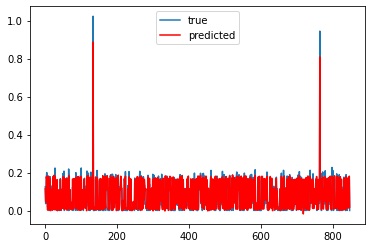

In [298]:
plt.plot(y_test_inv.flatten(),label = 'true')
plt.plot(y_pred_inv.flatten(), 'r',label = 'predicted')
plt.legend();

Quarter

In [307]:
forecastQua=forecastMonth = forecast[forecast['YearMonth'].between('2019-04-01', '2019-07-30')]

In [308]:
x_test = forecastQua[["SalesAgentEmailID","ContactEmailID","Month","Year","Product","Score"]].values
y_test = forecastQua[["Close_Value"]].values

In [309]:
y_pred = model1.predict(x_test)

In [310]:
from sklearn import metrics
from math import sqrt
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y_pred,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(y_pred,y_test)))

MEAN ABSOLUTE ERROR: 0.013242753223242332
ROOT MEAN SQUARE ERROR: 0.021450925108105205


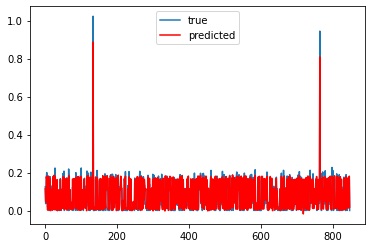

In [205]:
plt.plot(y_test_inv.flatten(),label = 'true')
plt.plot(y_pred_inv.flatten(), 'r',label = 'predicted')
plt.legend();

#### Financial Year

In [318]:
forecastyr = forecast[forecast['YearMonth'].between('2019-01-01', '2019-12-01')]

In [319]:
forecastyr.tail()

,SalesAgentEmailID,ContactEmailID,Product,Close_Value,Score,YearMonth,Year,Month
4229,0.310345,-0.476190,-0.333333,-0.929653,0.158297,2019-07-01,1.0,0.090909
4230,0.724138,0.571429,1.000000,-0.998545,-0.002386,2019-11-01,1.0,0.818182
4232,-0.586207,-0.428571,0.333333,-0.710942,0.261954,2019-07-01,1.0,0.090909
4233,0.379310,-0.880952,0.000000,-0.670744,-0.205593,2019-03-01,1.0,-0.636364
4237,0.586207,0.928571,1.000000,-0.998942,0.167609,2019-12-01,1.0,1.000000


In [320]:
x_test = forecastyr[["SalesAgentEmailID","ContactEmailID","Month","Year","Product","Score"]].values
y_test = forecastyr[["Close_Value"]].values

In [321]:
y_pred = model1.predict(x_test)

In [322]:
from sklearn import metrics
from math import sqrt
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(y_pred,y_test))
print("ROOT MEAN SQUARE ERROR:",sqrt(metrics.mean_squared_error(y_pred,y_test)))

MEAN ABSOLUTE ERROR: 0.013563770029513292
ROOT MEAN SQUARE ERROR: 0.02213840360768868


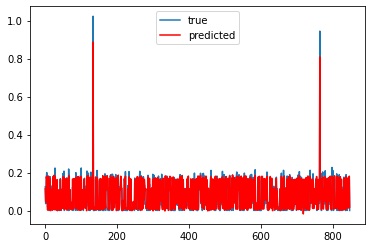

In [323]:
plt.plot(y_test_inv.flatten(),label = 'true')
plt.plot(y_pred_inv.flatten(), 'r',label = 'predicted')
plt.legend();